# Chapter 7 : Steady-State Errors
---

In [1]:
import sys

if (path := "C:/Users/Tom/pycharm-projects/python-control") not in sys.path:
    sys.path.append(path)

import sympy as sp
import numpy as np

from python_control import (
    s, t, K,
    FeedbackSystem, 
    TransferFunction, 
    InverseLaplaceTransform, LaplaceTransform,
    LineChart,
    sensitivity
)

## 7.2 : Steady-State Error for Unity-Feedback Systems

### Example 7.2 : Steady-State Errors for Systems with No Integrations

Find the steady-state errors for inputs $5u(t)$, $5tu(t)$, and $5t^2u(t)$ to the unity-feedback system having the forward transfer function:

In [2]:
G = TransferFunction(120 * (s + 2) / ((s + 3) * (s + 4)))
G.expr

(120.0*s + 240.0)/(1.0*s**2 + 7.0*s + 12.0)

Create the input functions and the unity-feedback system:

In [3]:
u = sp.Heaviside(t)
R1 = InverseLaplaceTransform(5 * u).transform()
R2 = InverseLaplaceTransform(5 * t * u).transform()
R3 = InverseLaplaceTransform(5 * t**2 * u).transform()

system = FeedbackSystem(G)

Check is the transfer functions are stable:

In [4]:
G.is_stable

True

In [5]:
system.closed_loop.is_stable

True

Function to plot the unity-feedback system's response:

In [6]:
def plot_response(system_, R_, t_f_ = 1.0):
    T = system_.closed_loop
    C = T.response(R_)
    c = C.inverse()
    if not isinstance(R_, LaplaceTransform):
        R_ = LaplaceTransform(R_)
    r = R_.inverse()
        
    t_array = np.linspace(0, t_f_, 100)
    c_array = c.evaluate(t_array)
    r_array = r.evaluate(t_array)
    
    chart = LineChart()
    chart.add_xy_data(
        label='response',
        x1_values=t_array,
        y1_values=c_array
    )
    chart.add_xy_data(
        label='input',
        x1_values=t_array,
        y1_values=r_array
    )
    chart.x1.add_title('time, s')
    chart.y1.add_title('response')
    chart.show()

**Steady-State Error with Input** $5u(t)$

In [7]:
e_oo, *_ = system.steady_state_error(R1)
e_oo

5/21

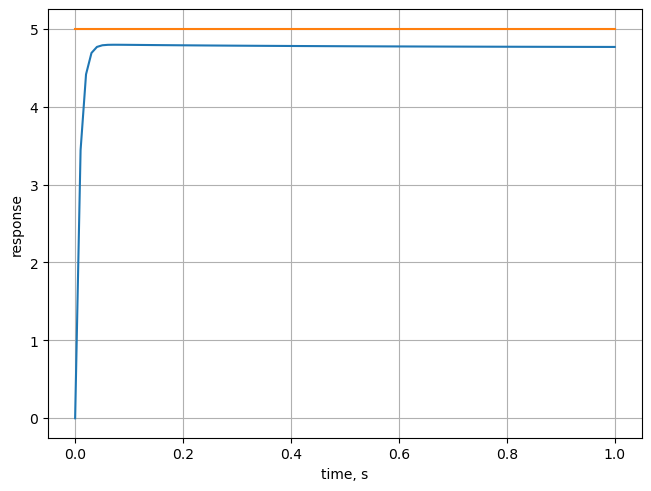

In [8]:
plot_response(system, R1)

**Steady-State Error with Input** $5tu(t)$

In [9]:
e_oo, *_ = system.steady_state_error(R2)
e_oo

oo

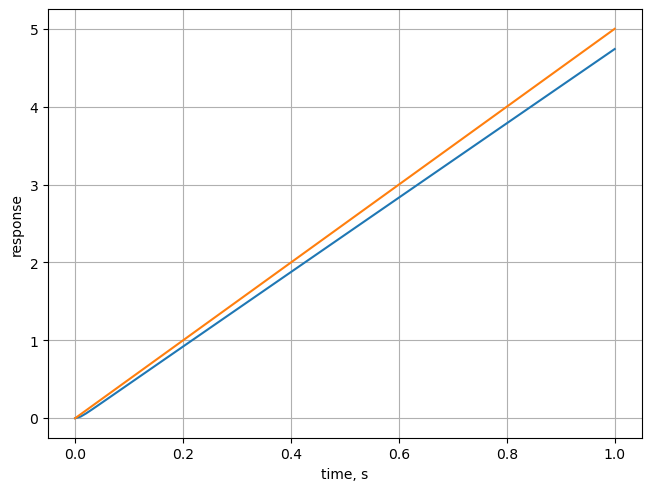

In [10]:
plot_response(system, R2)

**Steady-State Error with Input** $5t^2u(t)$

In [11]:
e_oo, *_ = system.steady_state_error(R3)
e_oo

oo

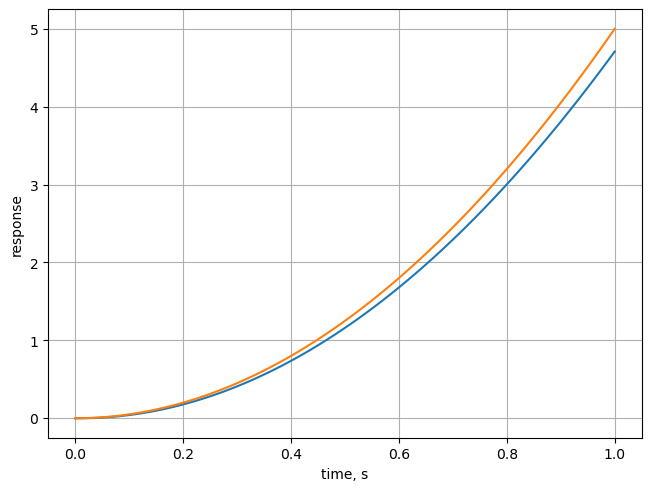

In [12]:
plot_response(system, R3)

### Example 7.3: Steady-State Errors for Systems with One Integration

Same as example 7.2, but with forward transfer function:

In [13]:
G = TransferFunction(100 * (s + 2) * (s + 6) / (s * (s + 3) * (s + 4)))
G.expr

(100.0*s**2 + 800.0*s + 1200.0)/(1.0*s**3 + 7.0*s**2 + 12.0*s)

Create unity-feedback system:

In [14]:
system = FeedbackSystem(G)

Check if transfer functions are stable:

In [15]:
G.is_stable

False

In [16]:
system.closed_loop.is_stable

True

**Steady-State Error with Input** $5u(t)$

In [17]:
e_oo, *_ = system.steady_state_error(R1)
e_oo

0

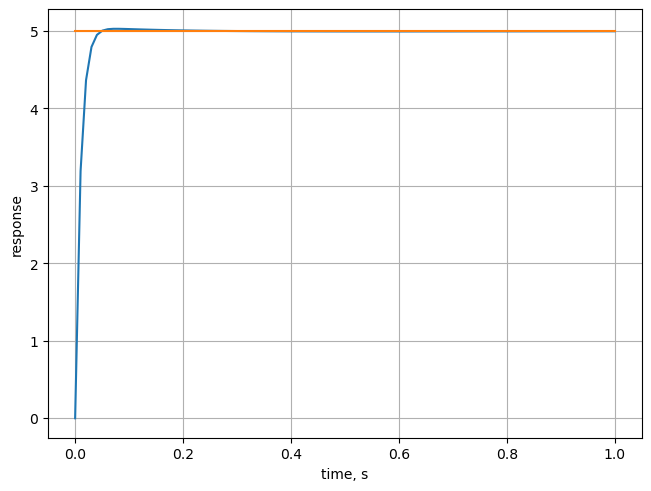

In [18]:
plot_response(system, R1)

**Steady-State Error with Input** $5tu(t)$

In [19]:
e_oo, *_ = system.steady_state_error(R2)
e_oo

1/20

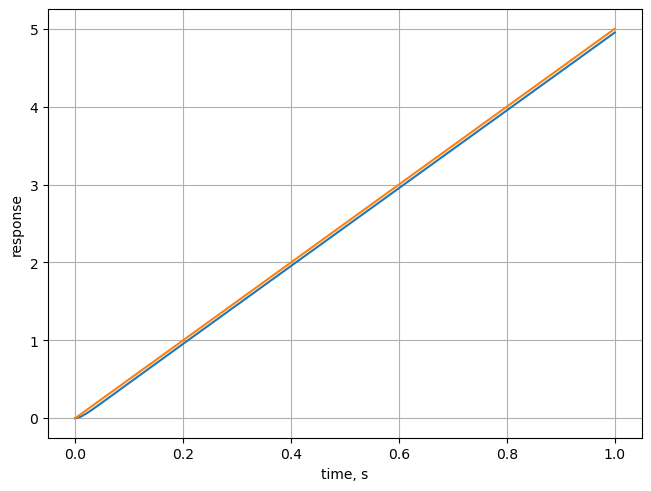

In [20]:
plot_response(system, R2)

**Steady-State Error with Input** $5t^2u(t)$

In [21]:
e_oo, *_ = system.steady_state_error(R3)
e_oo

oo

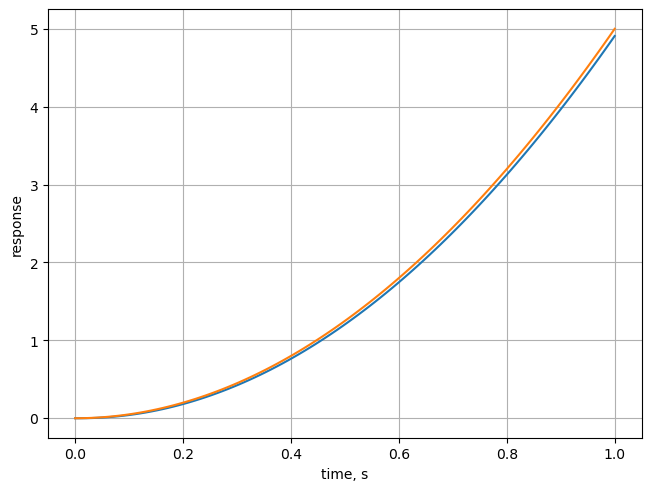

In [22]:
plot_response(system, R3)

## 7.5 : Steady-State Error for Disturbances

### Example 7.7 : Steady-State Error Due to Step Disturbance

Find the steady-state error component due to a step disturbance for the system:

![Feedback control system for example 7.7](./images/example_7-7.png)

In [23]:
system = FeedbackSystem(
    G1=TransferFunction(1000),
    G2=TransferFunction(1 / (s * (s + 25)))
)

In [24]:
system.closed_loop.is_stable

True

In [25]:
sse = system.steady_state_error(R=None, D=1/s)
sse.eD_oo

-1/1000

## 7.6 : Steady-State Error for Nonunity-Feedback Systems

### Example 7.8 : Steady-State Error for Nonunity-Feedback Systems

Find the system type, the appropriate static error constant associated with the system type, and the steady-state error for a unit step input. Assume input and output units are the same.

![Nonunity-feedback control system for example 7.8](./images/example_7-8.png)

In [26]:
G = TransferFunction(100 / (s * (s + 10)))
H = TransferFunction(1 / (s + 5))
system = FeedbackSystem(G1=G, H=H)

In [27]:
system.system_type

'type_0'

There are no pure integrations in the equivalent unity-feedback system. The appropriate static error constant is then $K_p$.

In [28]:
system.Kp

-1.25

In [29]:
e_oo, *_ = system.steady_state_error(R=1/s)
e_oo

-4

The negative value for steady-state error implies that the output step is larger than the input step.

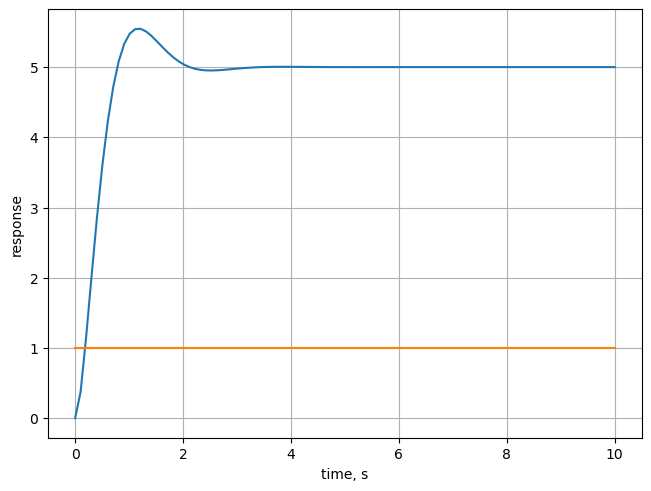

In [30]:
plot_response(system, 1/s, 10.0)

## 7.7 : Sensitivity

### Skill-Assessment Exercise 7.6

Find the sensitivity of the steady-state error to changes in $K$ for the system:

![system for skill-assessment exercise 7.6](./images/skill_exercise_7-6.png)

Define the feedback system:

In [31]:
G = TransferFunction(K * (s + 7) / (s**2 + 2*s + 10))
system = FeedbackSystem(G)

Find steady-state error as a function of $K$:

In [32]:
e_oo, *_ = system.steady_state_error(1/s)
e_oo

10/(7*K + 10)

The sensitivity is then:

In [33]:
S = sensitivity(e_oo, K)
S

-7*K/(7*K + 10)